# MLG: Lab 5 (Part 2)

## Exercise 3: Self-organized representation of a collection of images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

In [4]:
extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')
# Here we load images from 300-399 and from 500-599
extractor.load_images(list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)))

200 images loaded!


### Dataset Visualization

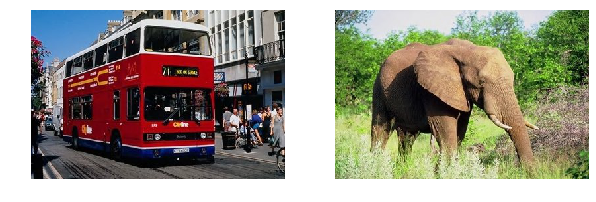

In [5]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[2])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[101])
_ = pl.axis('off')

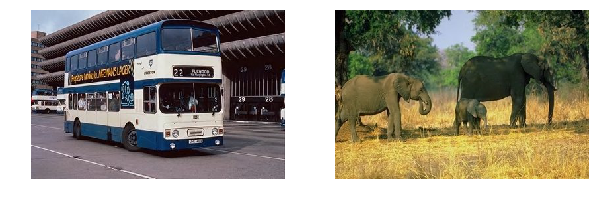

In [8]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[5])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[103])
_ = pl.axis('off')

### Clustering with SOM

In [90]:
method = 3
if method == 1:
    histograms = extractor.extract_histogram()
elif method == 2:
    histograms = extractor.extract_hue_histogram()
elif method == 3:
    histograms = extractor.extract_color_histogram()
else:
    print('Implement your own method for extracting features if you like!')

In [91]:
kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

/Users/Sashok/Documents/2018-2019/S6/MLG/labs/MLG-PW3/lab05/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


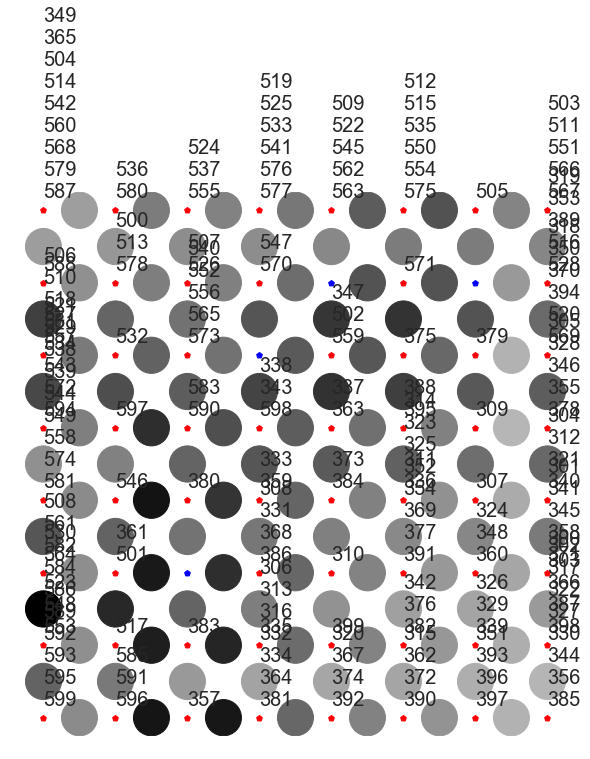

In [103]:
kmap.plot_umatrix(plot_empty=True, plot_names=True, fontsize=20, figsize=(10, 10))

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [93]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
extractor.to_html('som.html', kmap)

(200, 30)
[36618.  6764.  9590. 11932.  8310.  7787.  9065.  7153.   928.   157.
 34774.  8676.  5705.  3936.  6666. 14327. 20372.  3066.   417.   365.
 25359. 14017.  6927.  4041.  4549. 12068.  9761.  2325. 18571.   686.]
[ 6738.  6032.  7107.  9268. 10656. 11007. 13820. 16914. 15471.  1291.
  6682.  3730.  3743.  6971. 12867. 16741. 15541. 11953. 18026.  2050.
 13054. 11551. 12360. 14522. 17913. 12204.  5982.  2556.  5284.  2878.]


(array([4., 2., 3., 4., 1., 2., 5., 3., 2., 4.]),
 array([ 1291. ,  2964.5,  4638. ,  6311.5,  7985. ,  9658.5, 11332. ,
        13005.5, 14679. , 16352.5, 18026. ]),
 <a list of 10 Patch objects>)

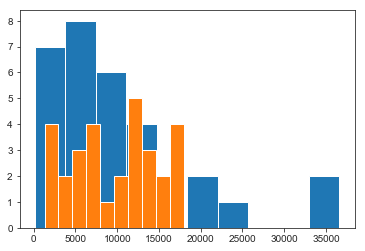

In [94]:
import matplotlib.pyplot as plt
print(histograms.shape)
print(histograms[1])
print(histograms[101])
plt.hist(histograms[1])
plt.hist(histograms[101])

(array([1., 0., 1., 2., 3., 2., 0., 0., 0., 1.]),
 array([   32. ,  2247.9,  4463.8,  6679.7,  8895.6, 11111.5, 13327.4,
        15543.3, 17759.2, 19975.1, 22191. ]),
 <a list of 10 Patch objects>)

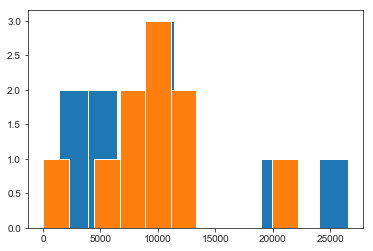

In [70]:
plt.hist(histograms[2])
plt.hist(histograms[102])

<h3>REPORT (date of submission: 23.5 before 23:55)</h3>

1. Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>

2. Try the SOM with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. 
<ul>
<li> Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. 
<li> Include for each experiment an U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...
</ul>
</p>

### Experiments with `skimage`

RGB -> grey

In [56]:
import skimage.io as skio
import skimage.color as skicol

In [72]:
image = skio.imread('Wang_Data/301.jpg')
grey = skicol.rgb2grey(image)
print(grey.shape)
print(image.shape)
grey

(256, 384)
(256, 384, 3)


array([[0.46944902, 0.48121373, 0.4969    , ..., 0.43847216, 0.44909804,
        0.41772549],
       [0.46944902, 0.48121373, 0.4969    , ..., 0.44631529, 0.44909804,
        0.40988235],
       [0.47337059, 0.48513529, 0.4969    , ..., 0.46060275, 0.45162078,
        0.40456196],
       ...,
       [0.42943098, 0.47230039, 0.48969098, ..., 0.52104784, 0.53673412,
        0.48183216],
       [0.28797176, 0.35492118, 0.45269255, ..., 0.53673412, 0.56026353,
        0.48967529],
       [0.27003059, 0.26836392, 0.34512863, ..., 0.5641851 , 0.58379294,
        0.50536157]])

In [65]:
hist_values, bins = np.histogram(grey, range=(0, 1), bins=10)
hist_values

array([30689, 13199,  5578,  3867,  7655, 20181, 14494,  1898,   424,
         319])

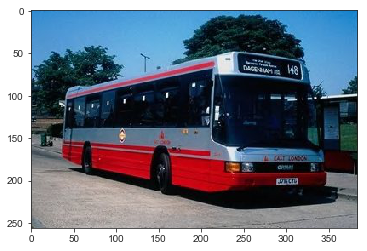

In [66]:
pl.imshow(image)

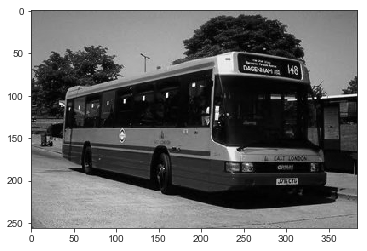

In [68]:
pl.imshow(grey, cmap=plt.cm.gray)

RGB -> HSV

(256, 384)


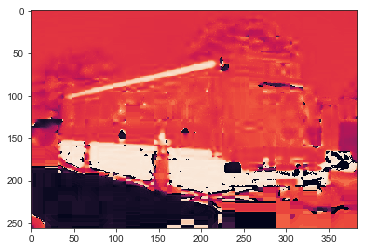

In [84]:
hsv = skicol.rgb2hsv(image)
hue_hsv = hsv[:, :, 0]
saturation_hsv = hsv[:, :, 1]
values_hsv = hsv[:, :, 2]
print(image_hsv.shape)
pl.imshow(hue_hsv)

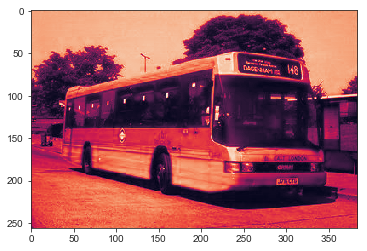

In [85]:
pl.imshow(values_hsv)

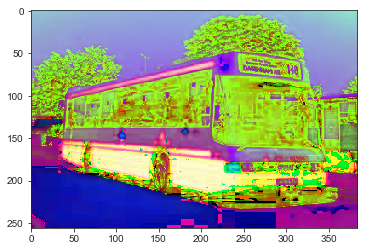

In [86]:
pl.imshow(hsv)

In [87]:
hue_hsv

array([[0.57246377, 0.57246377, 0.57246377, ..., 0.56851852, 0.57022472,
        0.57022472],
       [0.57246377, 0.57246377, 0.57246377, ..., 0.56851852, 0.57022472,
        0.57022472],
       [0.57246377, 0.57246377, 0.57246377, ..., 0.56703911, 0.56873823,
        0.56873823],
       ...,
       [0.30555556, 0.38888889, 0.44444444, ..., 0.61666667, 0.61666667,
        0.61666667],
       [0.28571429, 0.30555556, 0.38888889, ..., 0.61666667, 0.61666667,
        0.61666667],
       [0.23809524, 0.28571429, 0.33333333, ..., 0.61666667, 0.61666667,
        0.61666667]])

In [88]:
hue_hsv.reshape(-1)

array([0.57246377, 0.57246377, 0.57246377, ..., 0.61666667, 0.61666667,
       0.61666667])

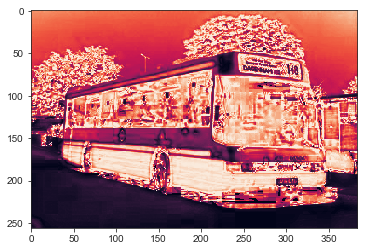

In [89]:
pl.imshow(saturation_hsv)

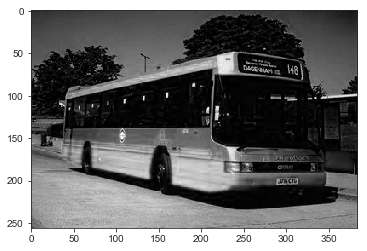

In [100]:
pl.imshow(image[:, :, 0], cmap=plt.cm.gray)

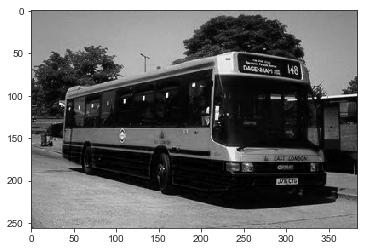

In [101]:
pl.imshow(image[:, :, 1], cmap=plt.cm.gray)

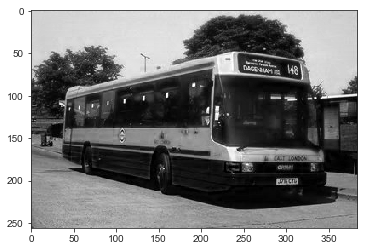

In [102]:
pl.imshow(image[:, :, 2], cmap=plt.cm.gray)

### Experiments with the custom sets of images

In [109]:
# Load the beaches, dinos and roses images
extractor.load_images(list_indices=list(np.arange(100, 200)) + list(np.arange(400, 500)) + list(np.arange(600, 700)))

300 images loaded!


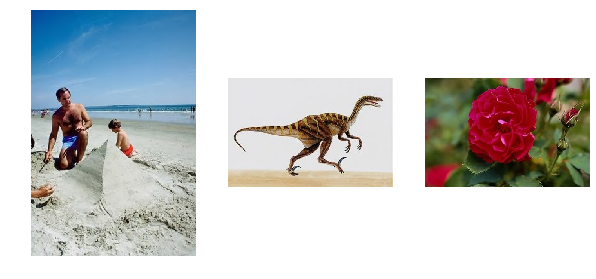

In [116]:
# Visualise an image from each set
pl.figure(figsize=(10, 20))
pl.subplot(131)
pl.imshow(extractor.images[1])
pl.axis('off')
pl.subplot(132)
pl.imshow(extractor.images[101])
pl.axis('off')
pl.subplot(133)
pl.imshow(extractor.images[201])
_ = pl.axis('off')

__Method 1__

/Users/Sashok/Documents/2018-2019/S6/MLG/labs/MLG-PW3/lab05/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


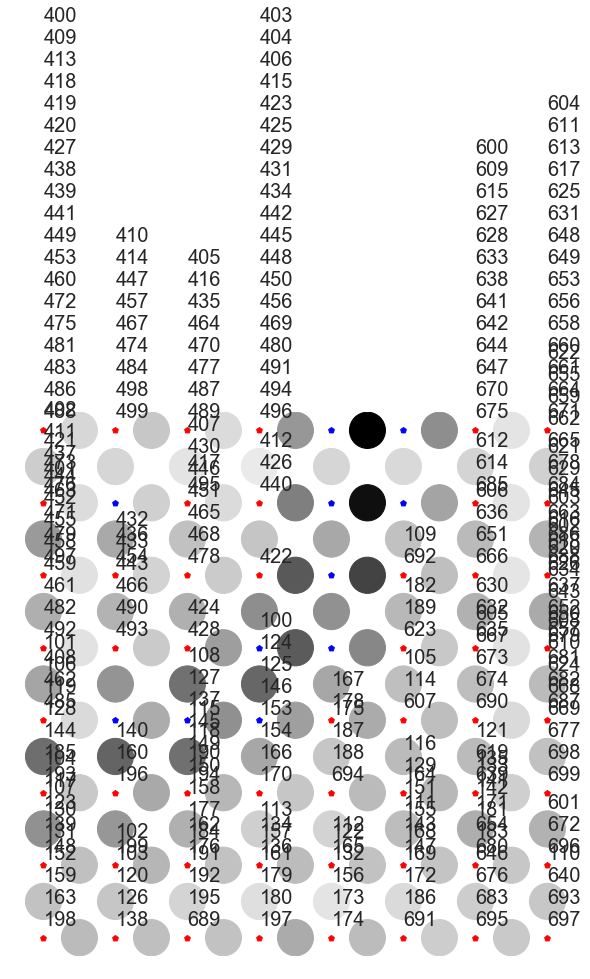

In [118]:
histograms = extractor.extract_histogram()

kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size) 
kmap.plot_umatrix(plot_empty=True, plot_names=True, fontsize=20, figsize=(10, 10))
extractor.to_html('som.html', kmap)

__Method 2__

/Users/Sashok/Documents/2018-2019/S6/MLG/labs/MLG-PW3/lab05/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


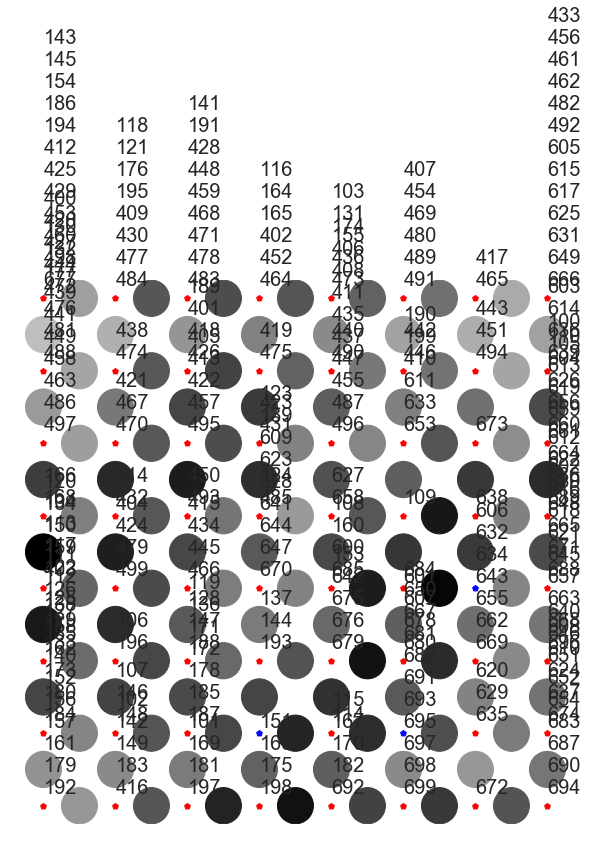

In [119]:
histograms = extractor.extract_hue_histogram()

kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size) 
kmap.plot_umatrix(plot_empty=True, plot_names=True, fontsize=20, figsize=(10, 10))
extractor.to_html('som.html', kmap)

/Users/Sashok/Documents/2018-2019/S6/MLG/labs/MLG-PW3/lab05/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


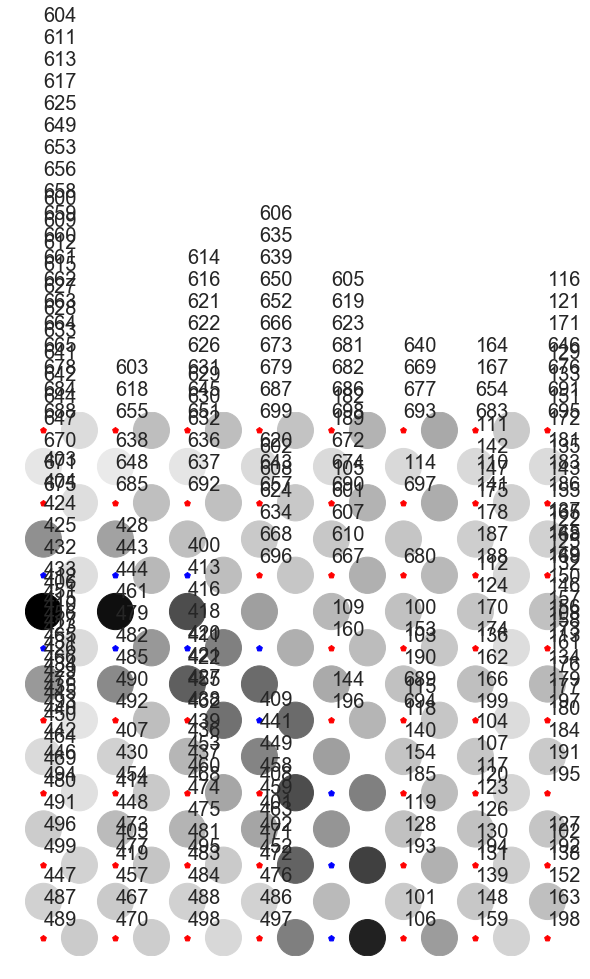

In [120]:
histograms = extractor.extract_color_histogram()

kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size) 
kmap.plot_umatrix(plot_empty=True, plot_names=True, fontsize=20, figsize=(10, 10))
extractor.to_html('som.html', kmap)

__Visualisation of the images with different filters applied__

In [132]:
# original images
beach = extractor.images[1]
dino = extractor.images[101]
rose = extractor.images[201]

# grayscale images
grey_beach = skicol.rgb2grey(beach)
grey_dino = skicol.rgb2grey(dino)
grey_rose = skicol.rgb2grey(rose)

# H-channel from HSV images
h_beach = skicol.rgb2hsv(beach)[:, :, 0]
h_dino = skicol.rgb2hsv(dino)[:, :, 0]
h_rose = skicol.rgb2hsv(rose)[:, :, 0]

# R-channel from RGB images
r_beach = beach[:, :, 0]
r_dino = dino[:, :, 0]
r_rose = rose[:, :, 0]

# G-channel from RGB images
g_beach = beach[:, :, 1]
g_dino = dino[:, :, 1]
g_rose = rose[:, :, 1]

# b-channel from RGB images
b_beach = beach[:, :, 2]
b_dino = dino[:, :, 2]
b_rose = rose[:, :, 2]

__Black and White pictures__

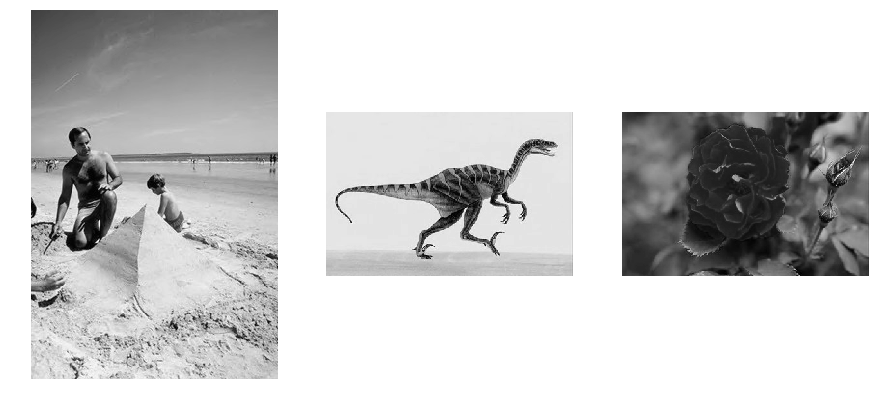

In [126]:
pl.figure(figsize=(15, 30))
pl.subplot(131)
pl.imshow(grey_beach, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(132)
pl.imshow(grey_dino, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(133)
pl.imshow(grey_rose, cmap=plt.cm.gray)
_ = pl.axis('off')

__Hue channel from HSV image__ 

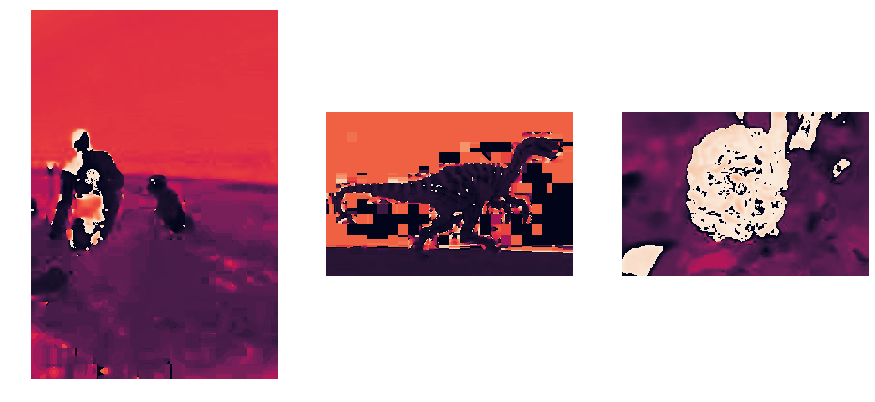

In [131]:
pl.figure(figsize=(15, 30))
pl.subplot(131)
pl.imshow(h_beach)
pl.axis('off')
pl.subplot(132)
pl.imshow(h_dino)
pl.axis('off')
pl.subplot(133)
pl.imshow(h_rose)
_ = pl.axis('off')

__Red channel from RGB images__

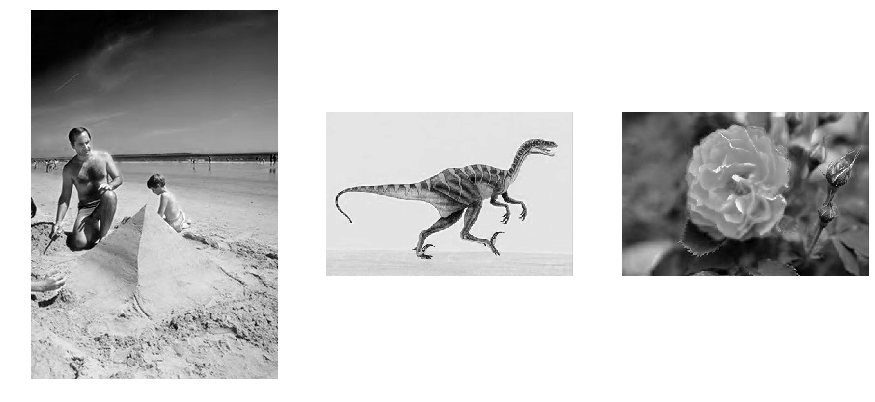

In [130]:
pl.figure(figsize=(15, 30))
pl.subplot(131)
pl.imshow(r_beach, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(132)
pl.imshow(r_dino, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(133)
pl.imshow(r_rose, cmap=plt.cm.gray)
_ = pl.axis('off')

__Green channel from RGB images__

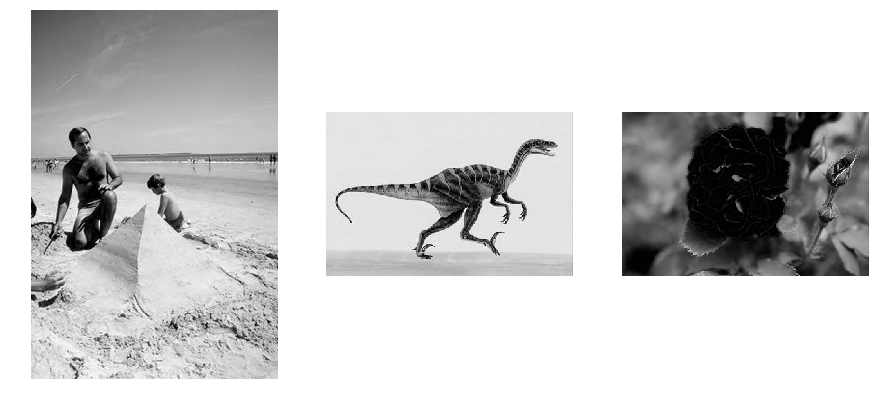

In [133]:
pl.figure(figsize=(15, 30))
pl.subplot(131)
pl.imshow(g_beach, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(132)
pl.imshow(g_dino, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(133)
pl.imshow(g_rose, cmap=plt.cm.gray)
_ = pl.axis('off')

__Blue channel from RGB images__

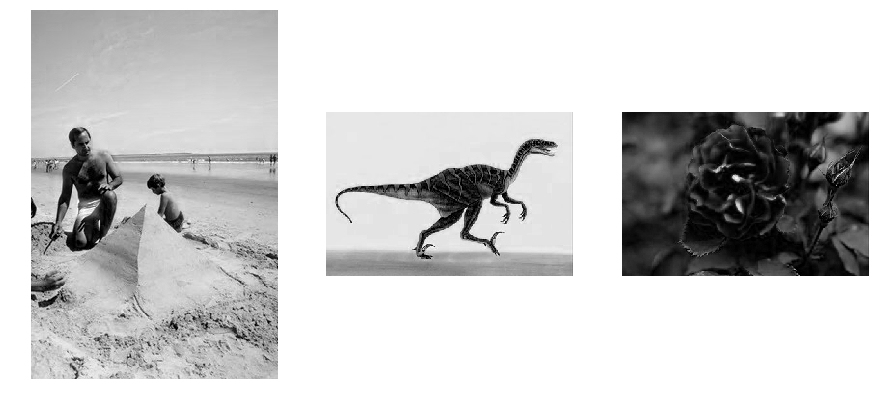

In [134]:
pl.figure(figsize=(15, 30))
pl.subplot(131)
pl.imshow(b_beach, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(132)
pl.imshow(b_dino, cmap=plt.cm.gray)
pl.axis('off')
pl.subplot(133)
pl.imshow(b_rose, cmap=plt.cm.gray)
_ = pl.axis('off')